In [1]:
#SVM-SVC

In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/SalaryData_Train(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df2 = df.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','capitalloss','Salary'])
df2

,age,educationno,capitalgain,hoursperweek,native
0,39,13,2174,40,United-States
1,50,13,0,13,United-States
2,38,9,0,40,United-States
3,53,7,0,40,United-States
4,28,13,0,40,Cuba
...,...,...,...,...,...
30156,27,12,0,38,United-States
30157,40,9,0,40,United-States
30158,58,9,0,40,United-States
30159,22,9,0,20,United-States


In [5]:
df2.describe()

,age,educationno,capitalgain,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,40.931269
std,13.134830,2.550037,7406.466611,11.980182
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           30161 non-null  int64 
 1   educationno   30161 non-null  int64 
 2   capitalgain   30161 non-null  int64 
 3   hoursperweek  30161 non-null  int64 
 4   native        30161 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


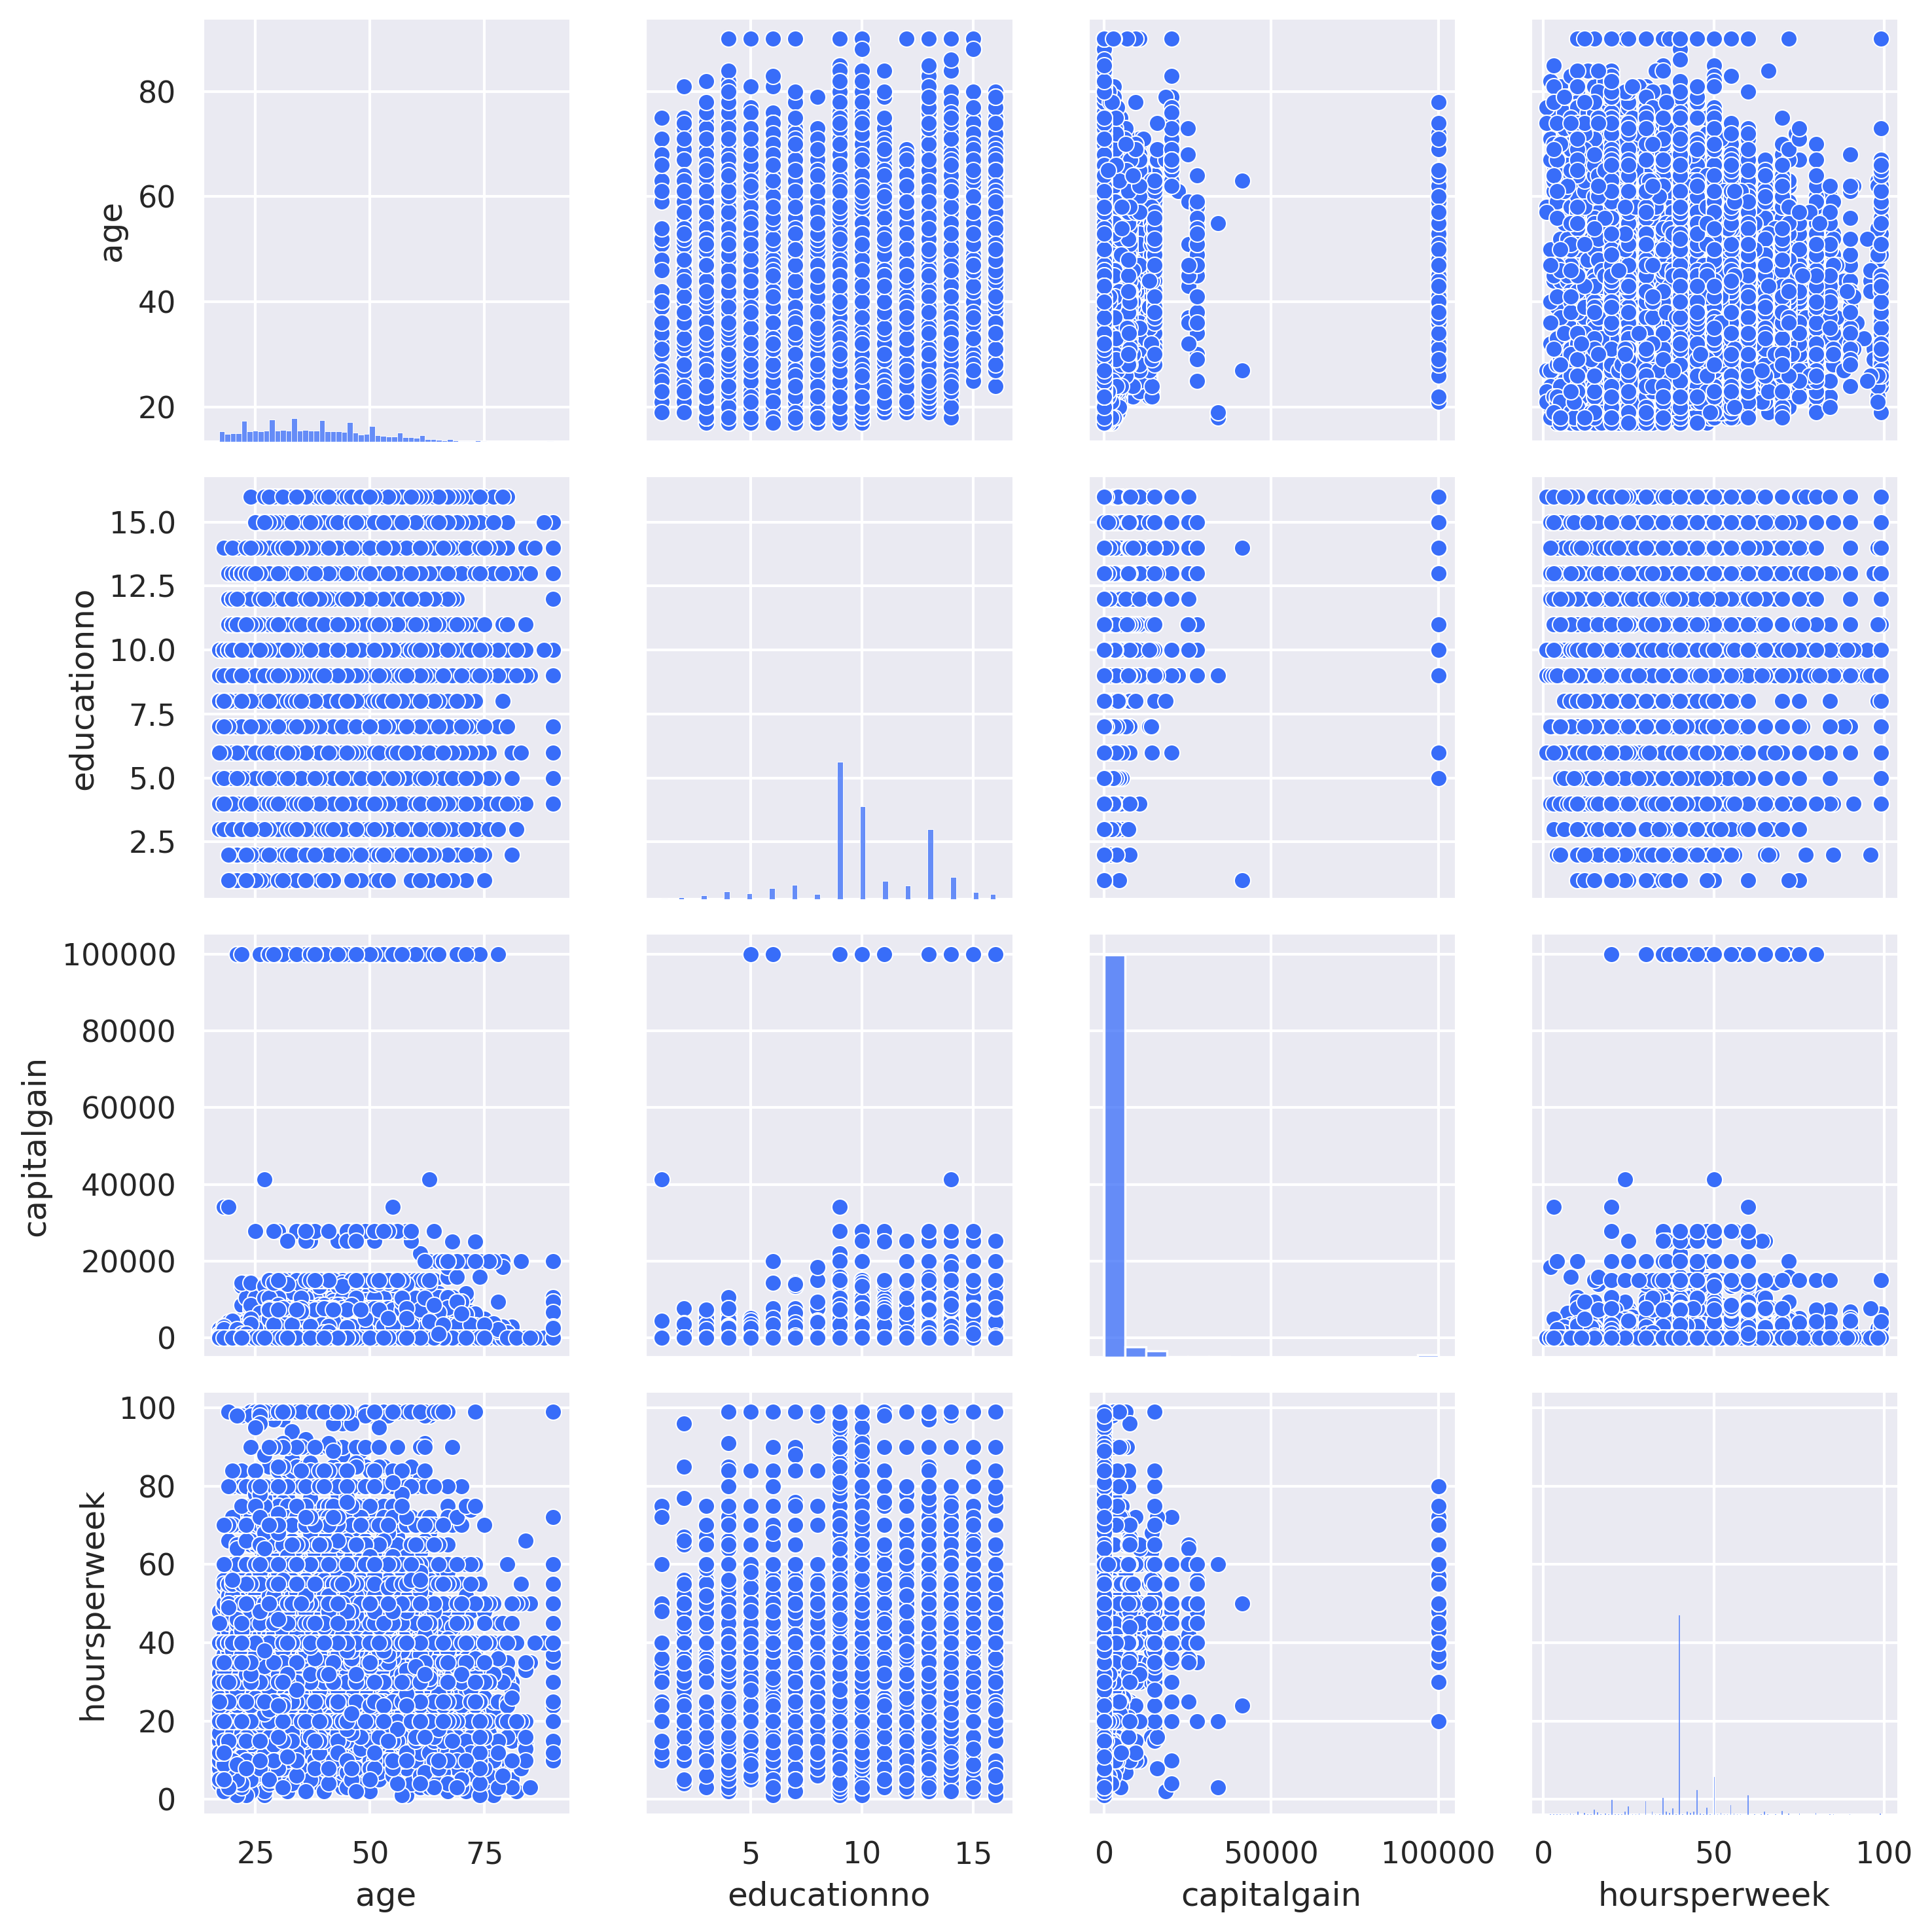

In [7]:
sns.pairplot(df2)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='capitalgain'>

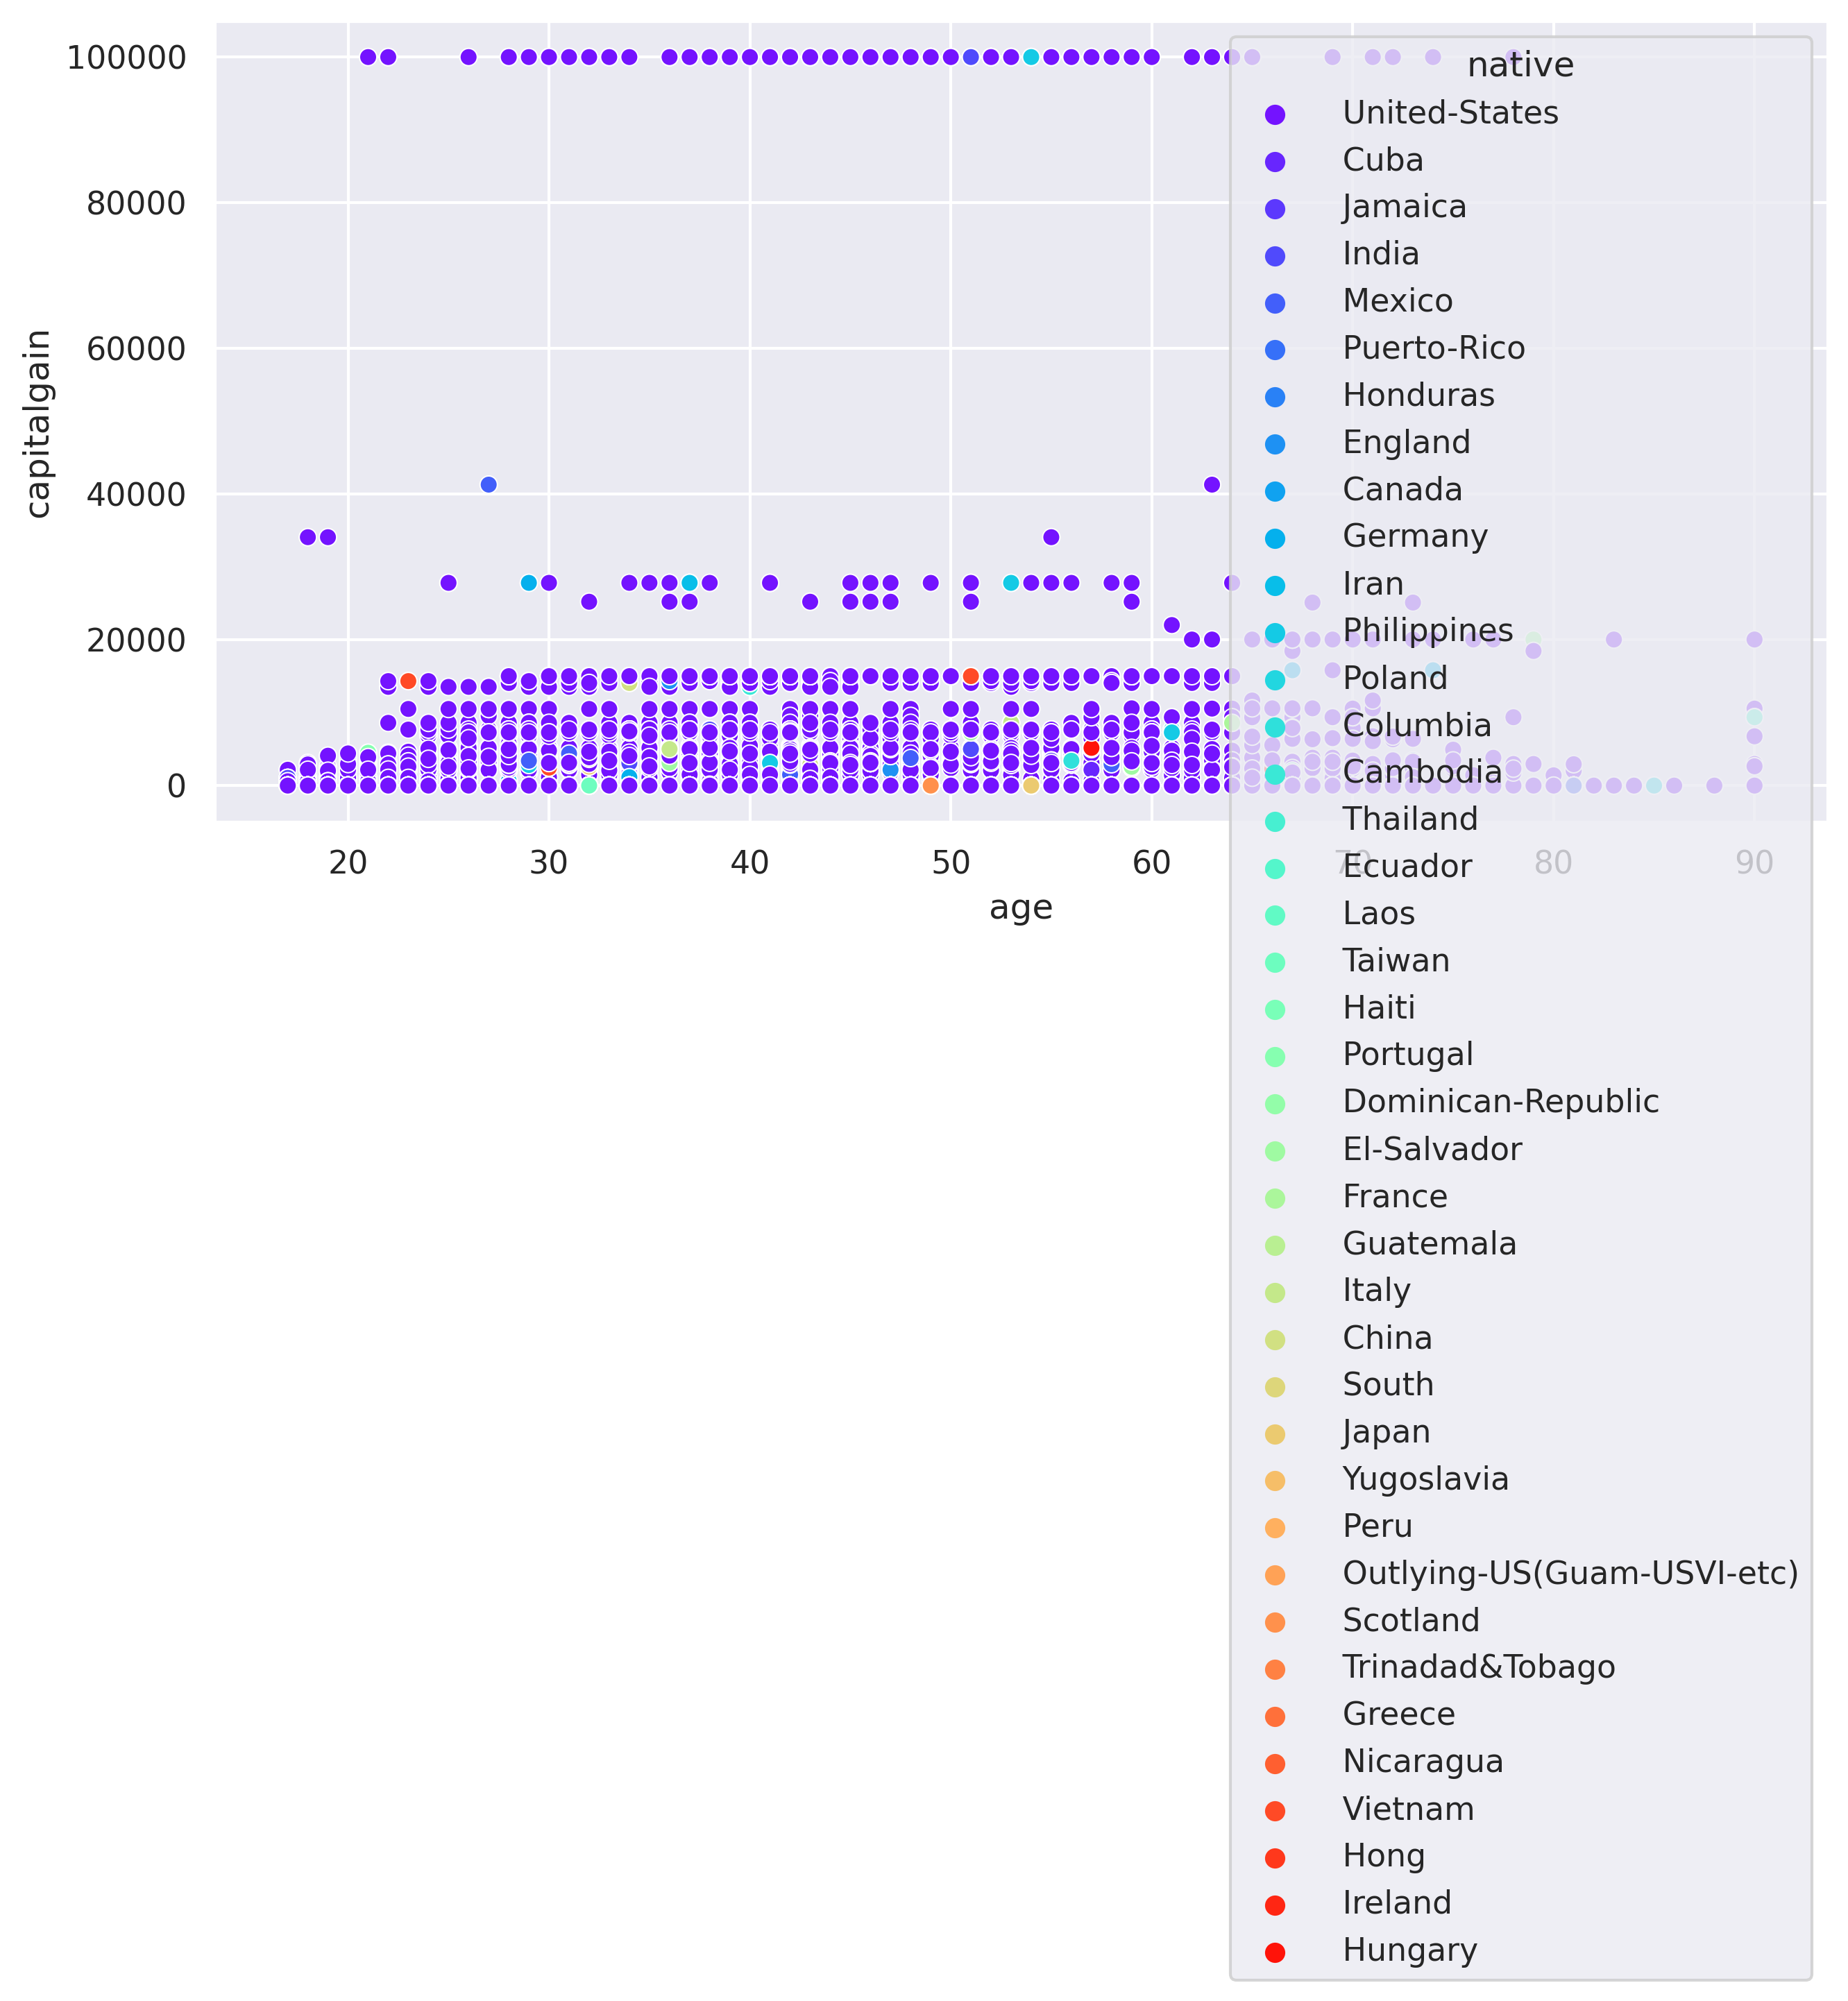

In [8]:
sns.scatterplot(x=df2['age'],y=df2['capitalgain'],hue=df2['native'],palette='rainbow')

In [9]:
x = df2.iloc[:,:-1]
y = df2['native']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
svm = SVC()
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(ytest,ypred))

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        15
                      China       0.00      0.00      0.00        11
                   Columbia       0.00      0.00      0.00         8
                       Cuba       0.00      0.00      0.00         7
         Dominican-Republic       0.00      0.00      0.00        22
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        22
                    England       0.00      0.00      0.00        12
                     France       0.00      0.00      0.00         2
                    Germany       0.00      0.00      0.00        28
                     Greece       0.00      0.00      0.00         8
                  Guatemala       0.00      0.00      0.00         9
                      Haiti      

In [14]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.9112649204244032, 0.9144704127299851)

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
svm = SVC(kernel='poly')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [18]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.9113478116710876, 0.9144704127299851)